In [1]:
# dataset from website kaggle.com
# https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

# if the link is not working you can download the dataset from the following links:
# train dataset : https://drive.google.com/file/d/13QwuZ-utNwf-CUlSqhMkjKVhHUMOxa1V/view?usp=sharing
# test  dataset : https://drive.google.com/file/d/1CimmcNMFiLuSWHeAuacZXI0ao9f-Zc3k/view?usp=sharing

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

import matplotlib.pyplot as plt


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')
print(train.shape,test.shape)


train.head()



(60000, 785) (10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:


X_train = train.iloc[:,1:]
y_train = train['label']
input_shape = [X_train.shape[1]]


X_test = test.iloc[:,1:]
y_test = test['label']


X_train = X_train/255
X_test = X_test/255

In [ ]:

model = Sequential([Dense(128,activation='relu',input_shape=input_shape),
                    # Dense(128,activation='relu'),
                    Dense(10,activation='softmax')])

model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['Accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)


In [ ]:
history=model.fit(X_train,y_train,epochs=15,validation_split=0.2, callbacks=[early_stopping])

Epoch 1/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2833 - Accuracy: 0.9190 - val_loss: 0.1556 - val_Accuracy: 0.9545
Epoch 2/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1256 - Accuracy: 0.9632 - val_loss: 0.1183 - val_Accuracy: 0.9655
Epoch 3/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0867 - Accuracy: 0.9744 - val_loss: 0.0975 - val_Accuracy: 0.9699
Epoch 4/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0645 - Accuracy: 0.9809 - val_loss: 0.0925 - val_Accuracy: 0.9716
Epoch 5/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0492 - Accuracy: 0.9852 - val_loss: 0.0875 - val_Accuracy: 0.9734
Epoch 6/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0398 - Accuracy: 0.9878 - val_loss: 0.0849 - val_Accuracy: 0.9761
Epoch 7/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0305 - Accuracy: 0.9911 - val_loss: 0.0960 - val_Accuracy

In [ ]:
y_pred=model.predict(X_test).argmax(axis=1)


313/313 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9776

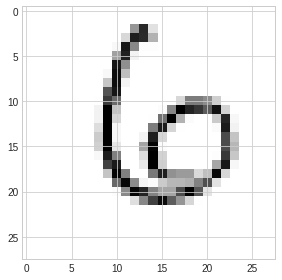

In [ ]:
plt.imshow(X_test.to_numpy()[100].reshape(28,28))

In [ ]:
print(y_pred[100])

6
